In [38]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("csv_hil/psam_h17.csv")

C:\Users\jstep\anaconda3\envs\Capstone\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,WGTP71,WGTP72,WGTP73,WGTP74,WGTP75,WGTP76,WGTP77,WGTP78,WGTP79,WGTP80
0,H,2014000000015,3,3108,2,17,1061728,1070673,13,4,...,4,15,25,24,15,13,11,15,14,24
1,H,2014000000029,3,2501,2,17,1061728,1070673,3,2,...,4,4,7,8,7,8,4,6,4,7
2,H,2014000000041,3,3502,2,17,1061728,1070673,31,1,...,25,38,49,53,9,26,34,24,9,14
3,H,2014000000113,3,3526,2,17,1061728,1070673,7,2,...,2,7,5,7,7,12,3,6,8,11
4,H,2014000000125,3,1105,2,17,1061728,1070673,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293827,H,2018HU1400791,3,401,2,17,1000000,1013097,21,0,...,39,6,22,6,6,23,24,23,22,6
293828,H,2018HU1400807,3,3208,2,17,1000000,1013097,18,4,...,6,16,6,5,19,6,31,19,16,17
293829,H,2018HU1400835,3,2601,2,17,1000000,1013097,24,2,...,36,7,25,42,33,19,25,25,24,23
293830,H,2018HU1400870,3,3407,2,17,1000000,1013097,24,2,...,39,23,7,24,7,46,24,7,7,23


In [4]:
target=df.HINCP.dropna()

In [5]:
new_df=df.merge(target,how="inner",right_index=True,left_index=True)

In [6]:
X=new_df[["WGTP13","WGTP20"]]
y=new_df["HINCP_y"]

In [7]:
X_train, X_test,y_train, y_test=train_test_split(X,y,train_size=.8)

In [8]:
lr=LinearRegression()


In [9]:
lr.fit(X_train,y_train)

LinearRegression()

In [10]:
lr.coef_

array([-31.98325892, -23.88675878])

In [11]:
lr.


2

In [17]:
lr.score(X_train,y_train)

0.00010604562776839188

In [18]:
lr.score(X_test,y_test)

0.00019777105872387235

Trying OLS Linear regression it has more useful test.

In [13]:
df=pd.read_csv("Imputed.csv")

In [15]:
df

,Unnamed: 0,HINCP_x,SMOCP,PUMA,NP,BDSP,INSP,RMSP,VALP,TAXAMT
0,0,47900.0,260.0,3108,4,3.0,260.0,6.0,260.0,260.0
1,1,36100.0,691.0,2501,2,3.0,600.0,6.0,35000.0,525.0
2,2,100000.0,260.0,3502,1,0.0,260.0,1.0,260.0,260.0
3,3,45000.0,260.0,3526,2,2.0,260.0,5.0,260.0,260.0
4,6,88000.0,603.0,1204,3,2.0,20.0,4.0,140.0,525.0
...,...,...,...,...,...,...,...,...,...,...
246497,293826,30000.0,1366.0,3208,1,4.0,0.0,11.0,150000.0,6500.0
246498,293828,150000.0,2603.0,3208,4,4.0,1200.0,8.0,275000.0,10500.0
246499,293829,85000.0,751.0,2601,2,3.0,550.0,6.0,145000.0,5750.0
246500,293830,117500.0,1168.0,3407,2,4.0,990.0,10.0,500000.0,11500.0


In [16]:
fsm_ols=pd.DataFrame([df.HINCP_x,df.TAXAMT])

In [17]:
fsm_ols

,0,1,2,3,4,5,6,7,8,9,...,246492,246493,246494,246495,246496,246497,246498,246499,246500,246501
HINCP_x,47900.0,36100.0,100000.0,45000.0,88000.0,56000.0,43020.0,35400.0,21500.0,8600.0,...,51000.0,26000.0,91000.0,148950.0,28800.0,30000.0,150000.0,85000.0,117500.0,89000.0
TAXAMT,260.0,525.0,260.0,260.0,525.0,0.0,260.0,2150.0,3150.0,260.0,...,260.0,1850.0,2450.0,4050.0,6500.0,6500.0,10500.0,5750.0,11500.0,260.0


In [20]:
fsm_ols=fsm_ols.T

In [21]:
fsm_ols

,HINCP_x,TAXAMT
0,47900.0,260.0
1,36100.0,525.0
2,100000.0,260.0
3,45000.0,260.0
4,88000.0,525.0
...,...,...
246497,30000.0,6500.0
246498,150000.0,10500.0
246499,85000.0,5750.0
246500,117500.0,11500.0


In [24]:
formula="HINCP_x ~ TAXAMT"

In [25]:
fsm=ols(formula=formula,data=fsm_ols).fit()

In [27]:
fsm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HINCP_x   R-squared:                       0.276
Model:                            OLS   Adj. R-squared:                  0.276
Method:                 Least Squares   F-statistic:                 9.404e+04
Date:                Wed, 05 Aug 2020   Prob (F-statistic):               0.00
Time:                        23:52:29   Log-Likelihood:            -3.1308e+06
No. Observations:              246502   AIC:                         6.262e+06
Df Residuals:                  246500   BIC:                         6.262e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.333e+04    213.598    202.847      0.000    4.29e+04    4.37e+04
TAXAMT        12.7733      0.042    306.661      0.000      12.692      12.855
==============================================================================
Omnibus:                   184857.235   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          5846825.414
Skew:                           3.311   Prob(JB):                         0.00
Kurtosis:                      25.922   Cond. No.                     6.85e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.85e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Time for Assumptions check

Linearity

In [30]:
from statsmodels.stats.diagnostic import linear_rainbow,het_breuschpagan
from statsmodels.stats.outliers_influence import variance_inflation_factor

rainbow_statisic, rainbow_p_value=linear_rainbow(fsm)
print("Rainbow Statistic:",rainbow_statisic)
print("Rainbow p-value:",rainbow_p_value)

Rainbow Statistic: 1.0020214097466353
Rainbow p-value: 0.36149370035744577


Normality

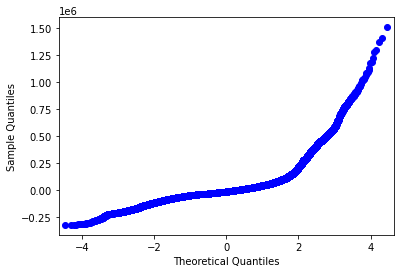

In [36]:
fsm_resids=fsm.resid

import statsmodels.api as sm
sm.qqplot(fsm_resids);

Homoscadaacity

In [37]:
y_hat=fsm.predict()


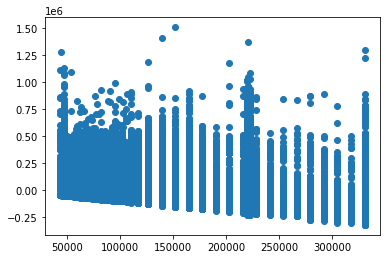

In [39]:
plt.scatter(y_hat,fsm_resids);

In [40]:
lm, lm_p_value, fvalue,f_p_value=het_breuschpagan(fsm_resids,fsm_ols[["TAXAMT"]])
print("Lagrange Multipler p-value:", lm_p_value)
print("F-Statistic p-value:",f_p_value)

Lagrange Multipler p-value: nan
F-Statistic p-value: 0.0
